In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Datasets//tmdb_cleaned.csv', index_col=0)

In [3]:
df.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_count,Profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,11800,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,4500,661000000
2,245000000,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...",en,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B']","['GB', 'United Kingdom', 'US', 'United States ...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,4466,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",en,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros', 'DC Ente...","['US', 'United States of America']",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,9106,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",en,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"['US', 'United States of America']",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,2124,24139100


In [4]:
# show the data types of each column
df.dtypes

budget                    int64
genres                   object
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
tagline                  object
title                    object
vote_count                int64
Profit                    int64
dtype: object

In [5]:
# change release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

### All columns has the right data types now

### Let's group the column into categorical and numerical column

In [6]:
cat_cols = df.select_dtypes(exclude=[np.number])
num_cols = df.select_dtypes(include=[np.number])

In [7]:
# All the categorical columns
cat_cols.head(2)

,genres,keywords,original_language,overview,production_companies,production_countries,release_date,tagline,title
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...","['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,Enter the World of Pandora.,Avatar
1,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End


In [8]:
# All the Qualitative columns
num_cols.head(2)

,budget,popularity,revenue,runtime,vote_count,Profit
0,237000000,150.437577,2787965087,162.0,11800,2550965087
1,300000000,139.082615,961000000,169.0,4500,661000000


In [9]:
#Let's check if there's still any missing values
df.isna().sum()

budget                  0
genres                  0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
tagline                 0
title                   0
vote_count              0
Profit                  0
dtype: int64

There's no missing value. Now let's start

## Univariate Analysis

In [10]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')

Bar Chart for genres column


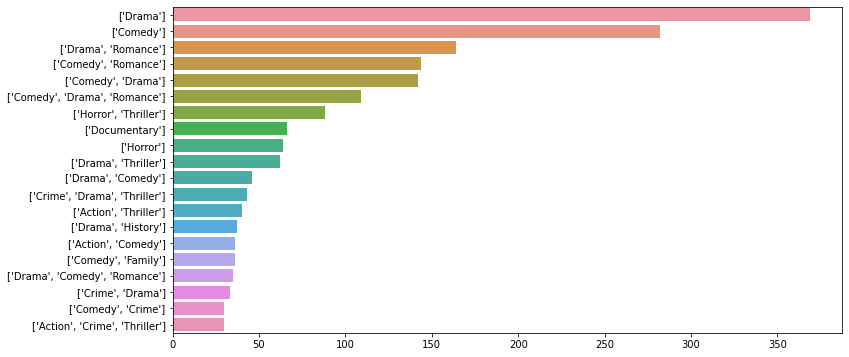

Bar Chart for keywords column


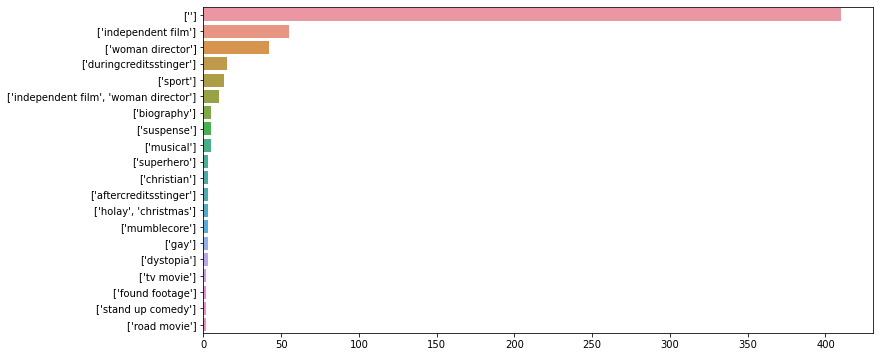

Bar Chart for original_language column


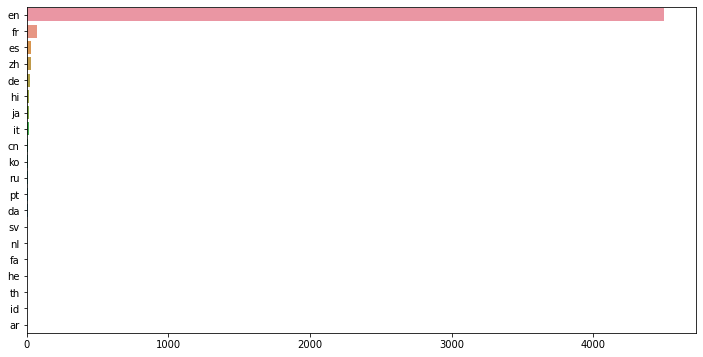

Bar Chart for production_companies column


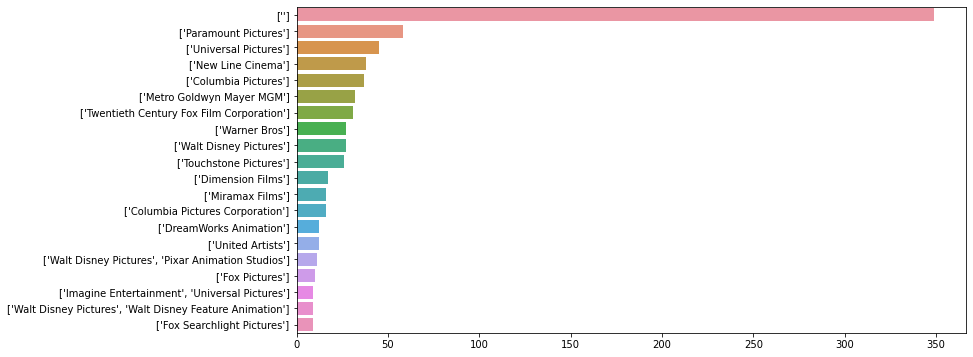

Bar Chart for production_countries column


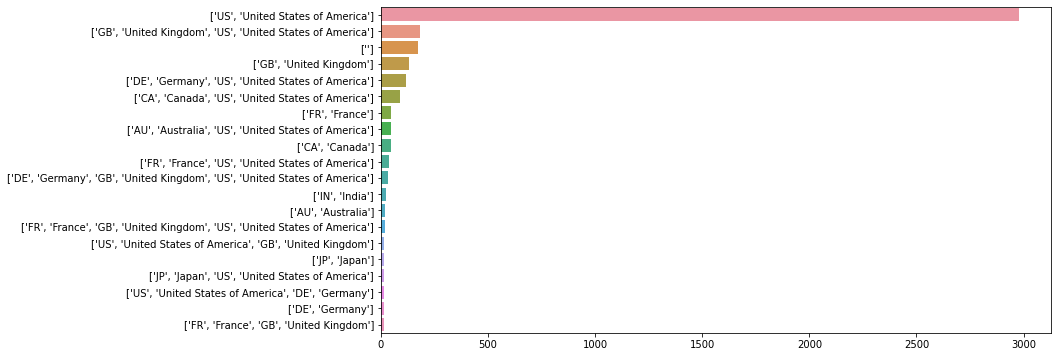

In [83]:
for col in cat_cols[['genres', 'keywords', 'original_language', 'production_companies', 'production_countries']].columns:
    val_cnt = cat_cols[col].value_counts()[:20]
    print(f'Bar Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.barplot(x=val_cnt.values, y=val_cnt.index)
    plt.show()

In [12]:
## CONCLUSION: The 

Histogram Chart for budget column


<Figure size 864x432 with 0 Axes>

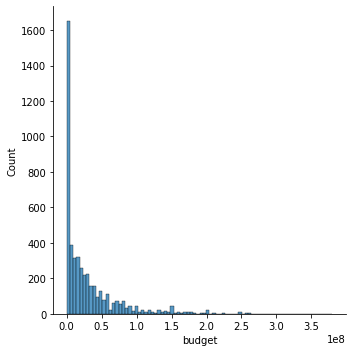

Histogram Chart for popularity column


<Figure size 864x432 with 0 Axes>

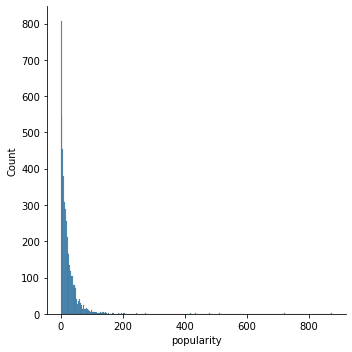

Histogram Chart for revenue column


<Figure size 864x432 with 0 Axes>

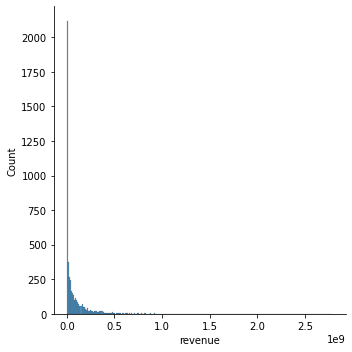

Histogram Chart for runtime column


<Figure size 864x432 with 0 Axes>

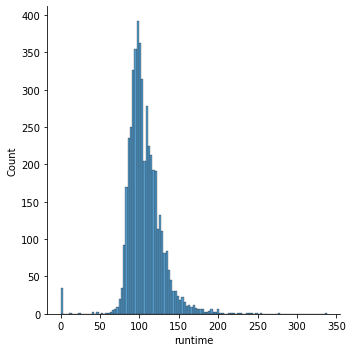

Histogram Chart for vote_count column


<Figure size 864x432 with 0 Axes>

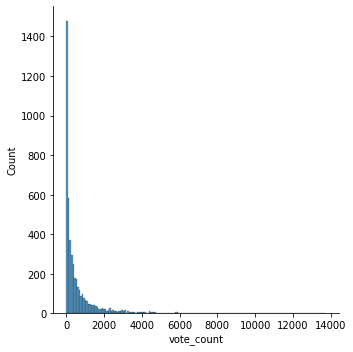

Histogram Chart for Profit column


<Figure size 864x432 with 0 Axes>

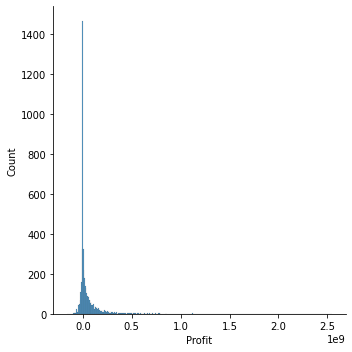

In [13]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Histogram Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.displot(x=num_cols[col]);
    plt.show();

Boxplot Chart for budget column


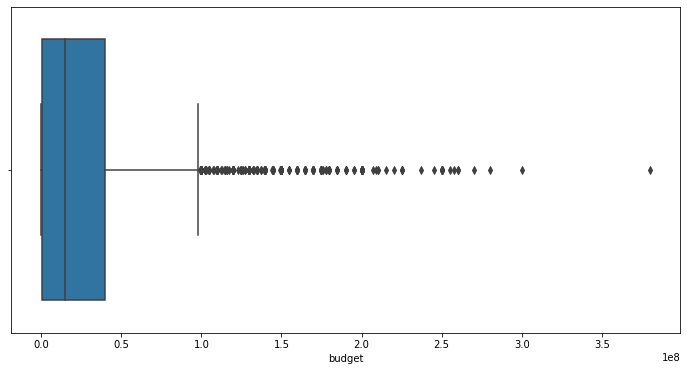

Boxplot Chart for popularity column


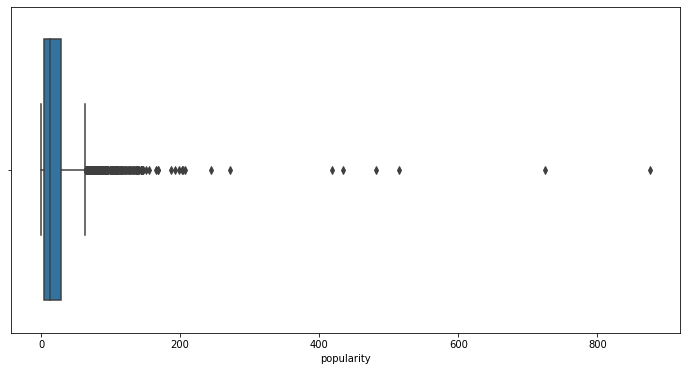

Boxplot Chart for revenue column


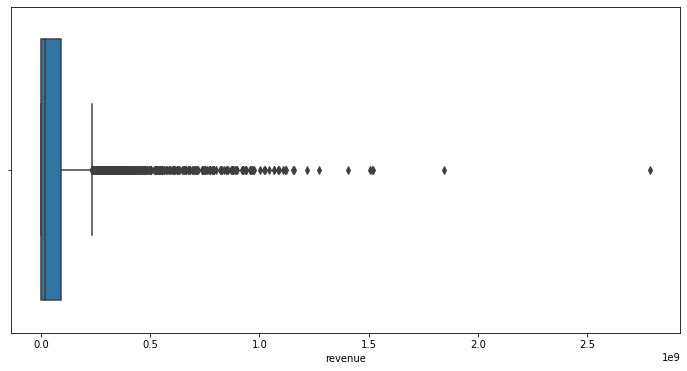

Boxplot Chart for runtime column


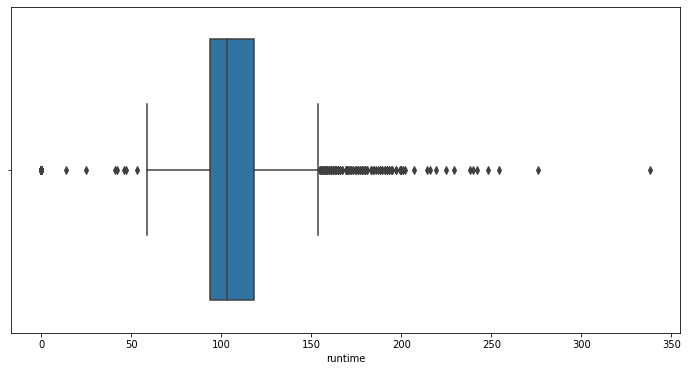

Boxplot Chart for vote_count column


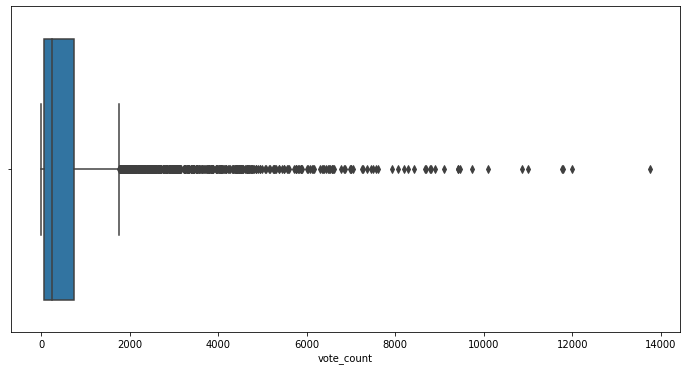

Boxplot Chart for Profit column


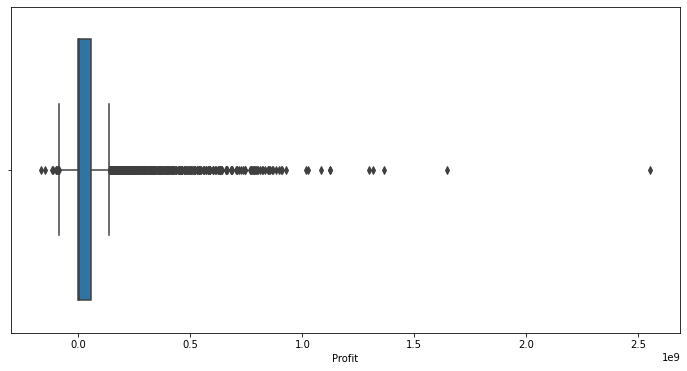

In [14]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Boxplot Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.boxplot(x=num_cols[col]);
    plt.show();

Density Plot for budget column


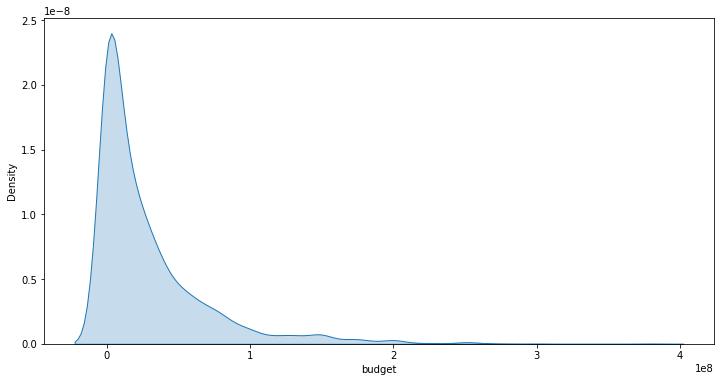

Density Plot for popularity column


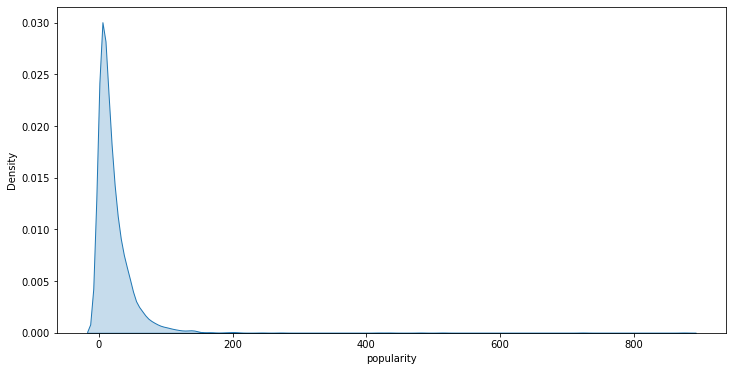

Density Plot for revenue column


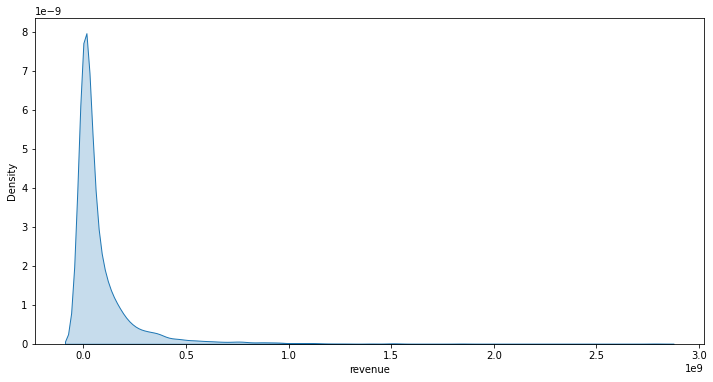

Density Plot for runtime column


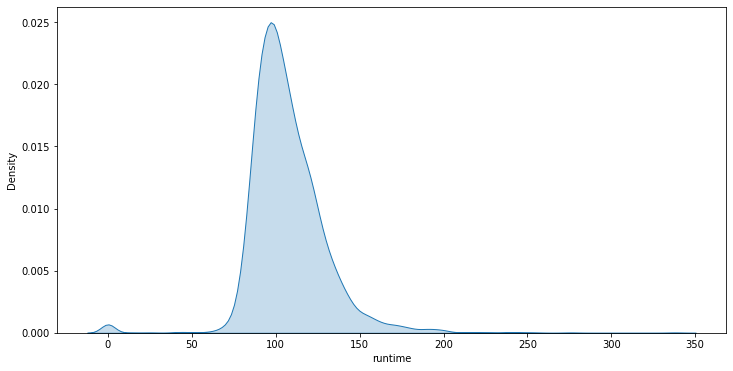

Density Plot for vote_count column


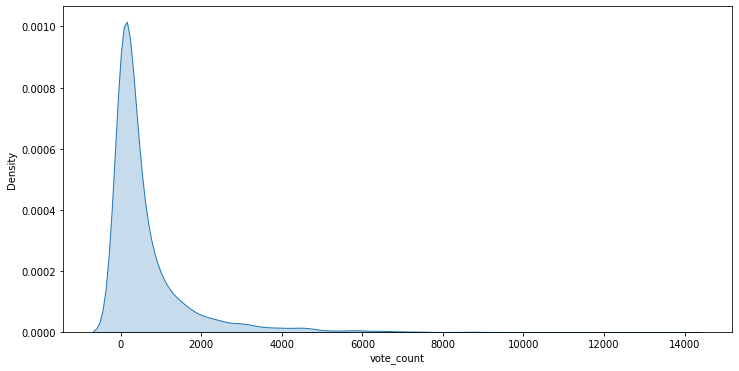

Density Plot for Profit column


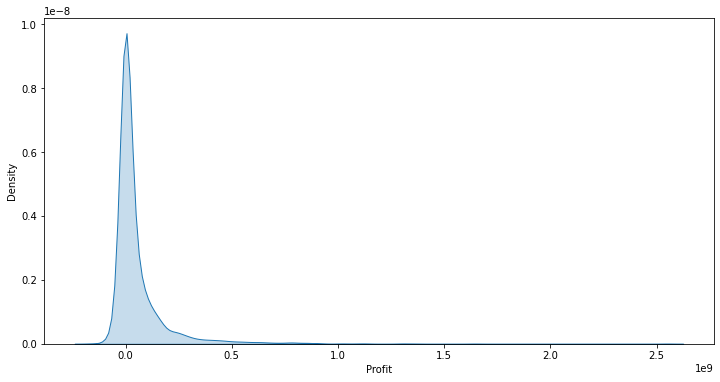

In [15]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Density Plot for {col} column')
    plt.figure(figsize=(12,6))
    sns.kdeplot(x=num_cols[col], shade=True);
    plt.show();

In [17]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')

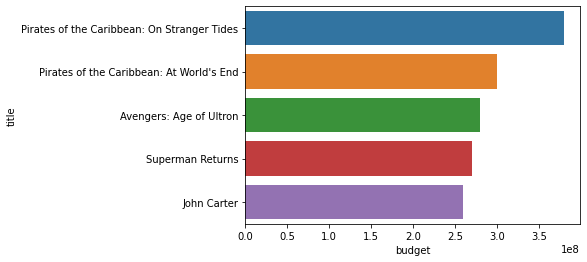

In [18]:
t = df.loc[df.budget.sort_values(ascending=False).head().index]
sns.barplot(y=t['title'], x=t['budget']);

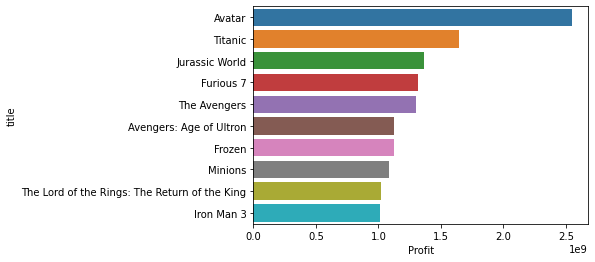

In [19]:
p = df.loc[df.Profit.sort_values(ascending=False).head(10).index]
sns.barplot(y=p['title'], x=p['Profit']);

In [20]:
### of the top five spenders (highest budget), only one (Avengers: Age of ultrons. Positioned at no 6) make it to the list of the top 10 MOST PROFITABLE.

In [21]:
# now let's see the genres. production companies and production countries of the highest spenders

In [22]:
t[['title', 'genres', 'production_companies', 'production_countries']]

,title,genres,production_companies,production_countries
17,Pirates of the Caribbean: On Stranger Tides,"['Adventure', 'Action', 'Fantasy']","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']"
1,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']"
7,Avengers: Age of Ultron,"['Action', 'Adventure', 'Science Fiction']","['Marvel Studios', 'Prime Focus', 'Revolution ...","['US', 'United States of America']"
10,Superman Returns,"['Adventure', 'Fantasy', 'Action', 'Science Fi...","['DC Comics', 'Legendary Pictures', 'Warner Br...","['US', 'United States of America']"
4,John Carter,"['Action', 'Adventure', 'Science Fiction']",['Walt Disney Pictures'],"['US', 'United States of America']"


In [23]:
### CONCLUSION: All of the highest spenders are made in the United States only. The most common genres for the movies are Action and adventure. Walt disney Picture appears in three movies out of the five

In [24]:
from collections import Counter

In [25]:
def extend_and_count(col):
    upper = []
    for row in col:
        upper.extend(eval(row))
    return Counter(upper)

In [26]:
# now let's see the genres. production companies and production countries of the highest earners

In [27]:
p[['title', 'genres', 'production_companies', 'production_countries']]

,title,genres,production_companies,production_countries
0,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit..."
25,Titanic,"['Drama', 'Romance', 'Thriller']","['Paramount Pictures', 'Twentieth Century Fox ...","['US', 'United States of America']"
28,Jurassic World,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Universal Studios', 'Amblin Entertainment', ...","['US', 'United States of America']"
44,Furious 7,['Action'],"['Universal Pictures', 'Original Film', 'Fuji ...","['JP', 'Japan', 'US', 'United States of America']"
16,The Avengers,"['Science Fiction', 'Action', 'Adventure']","['Paramount Pictures', 'Marvel Studios']","['US', 'United States of America']"
7,Avengers: Age of Ultron,"['Action', 'Adventure', 'Science Fiction']","['Marvel Studios', 'Prime Focus', 'Revolution ...","['US', 'United States of America']"
124,Frozen,"['Animation', 'Adventure', 'Family']","['Walt Disney Pictures', 'Walt Disney Animatio...","['US', 'United States of America']"
546,Minions,"['Family', 'Animation', 'Adventure', 'Comedy']","['Universal Pictures', 'Illumination Entertain...","['US', 'United States of America']"
329,The Lord of the Rings: The Return of the King,"['Adventure', 'Fantasy', 'Action']","['WingNut Films', 'New Line Cinema']","['NZ', 'New Zealand', 'US', 'United States of ..."
31,Iron Man 3,"['Action', 'Adventure', 'Science Fiction']",['Marvel Studios'],"['CN', 'China', 'US', 'United States of America']"


In [ ]:
 ### let's add a column to calculate the percentage of budget in revenue

In [28]:
p['percent'] = np.round((p['budget'] / p['revenue']) * 100)
p.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_count,Profit,percent
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,11800,2550965087,9.0
25,200000000,"['Drama', 'Romance', 'Thriller']","['shipwreck', 'iceberg', 'ship', 'panic', 'tit...",en,"84 years later, a 101-year-old woman named Ros...",100.025899,"['Paramount Pictures', 'Twentieth Century Fox ...","['US', 'United States of America']",1997-11-18,1845034188,194.0,Nothing on Earth could come between them.,Titanic,7562,1645034188,11.0
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...","['monster', 'dna', 'tyrannosaurus rex', 'veloc...",en,Twenty-two years after the events of Jurassic ...,418.708552,"['Universal Studios', 'Amblin Entertainment', ...","['US', 'United States of America']",2015-06-09,1513528810,124.0,The park is open.,Jurassic World,8662,1363528810,10.0
44,190000000,['Action'],"['car race', 'speed', 'revenge', 'suspense', '...",en,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"['Universal Pictures', 'Original Film', 'Fuji ...","['JP', 'Japan', 'US', 'United States of America']",2015-04-01,1506249360,137.0,Vengeance Hits Home,Furious 7,4176,1316249360,13.0
16,220000000,"['Science Fiction', 'Action', 'Adventure']","['new york', 'shield', 'marvel comic', 'superh...",en,When an unexpected enemy emerges and threatens...,144.448633,"['Paramount Pictures', 'Marvel Studios']","['US', 'United States of America']",2012-04-25,1519557910,143.0,Some assembly required.,The Avengers,11776,1299557910,14.0


In [29]:
t['percent'] = np.round((t['budget'] / t['revenue']) * 100)
t.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_count,Profit,percent
17,380000000,"['Adventure', 'Action', 'Fantasy']","['sea', 'captain', 'mutiny', 'sword', 'prime m...",en,Captain Jack Sparrow crosses paths with a woma...,135.413856,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2011-05-14,1045713802,136.0,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,4948,665713802,36.0
1,300000000,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,4500,661000000,31.0
7,280000000,"['Action', 'Adventure', 'Science Fiction']","['marvel comic', 'sequel', 'superhero', 'based...",en,When Tony Stark tries to jumpstart a dormant p...,134.279229,"['Marvel Studios', 'Prime Focus', 'Revolution ...","['US', 'United States of America']",2015-04-22,1405403694,141.0,A New Age Has Come.,Avengers: Age of Ultron,6767,1125403694,20.0
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...","['saving the world', 'dc comics', 'invulnerabi...",en,Superman returns to discover his 5-year absenc...,57.925623,"['DC Comics', 'Legendary Pictures', 'Warner Br...","['US', 'United States of America']",2006-06-28,391081192,154.0,No Tagline,Superman Returns,1400,121081192,69.0
4,260000000,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",en,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"['US', 'United States of America']",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,2124,24139100,92.0


In [30]:
### CONCLUSION: In the highest earners, most (6) of the production countries are united states, and most (3) of the production companies are Marvel Studios and the most common genres are Adventure, Action and Science Fiction

In [ ]:
### Let's see the most common genres combined in the dataset

In [32]:
genres = extend_and_count(df['genres'])

In [36]:
genres.most_common(5)

[('Drama', 2296),
 ('Comedy', 1722),
 ('Thriller', 1274),
 ('Action', 1154),
 ('Romance', 894)]

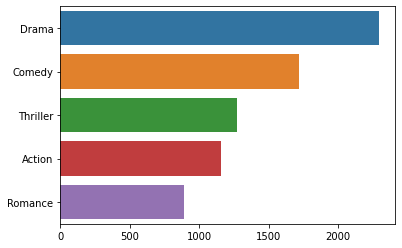

In [37]:
sns.barplot(y=[genre for genre, count in genres.most_common(5)], x=[count for genre, count in genres.most_common(5)]);

In [39]:
prod_com = extend_and_count(df['production_companies'])

In [81]:
del prod_com[""]

In [82]:
prod_com.most_common(10)

[('Warner Bros', 319),
 ('Universal Pictures', 311),
 ('Paramount Pictures', 285),
 ('Twentieth Century Fox Film Corporation', 222),
 ('Columbia Pictures', 201),
 ('New Line Cinema', 165),
 ('Metro Goldwyn Mayer MGM', 122),
 ('Touchstone Pictures', 118),
 ('Walt Disney Pictures', 114),
 ('Relativity Media', 102)]

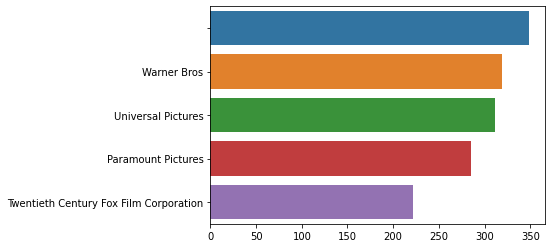

In [64]:
sns.barplot(y=[com for com, count in prod_com.most_common(5)], x=[count for com, count in prod_com.most_common(5)]);

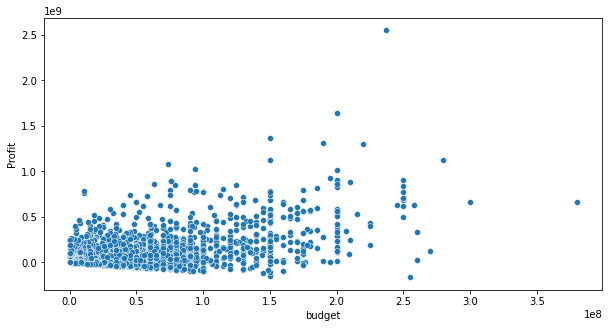

In [71]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='budget', y='Profit', data=df);

In [ ]:
## by looking at this plot, we can clearly see that more budget doesn't mean more profit. 

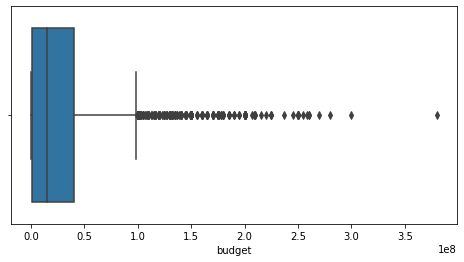

In [74]:
## Let's find the outliers in 'budget' and 'runtime'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['budget']);

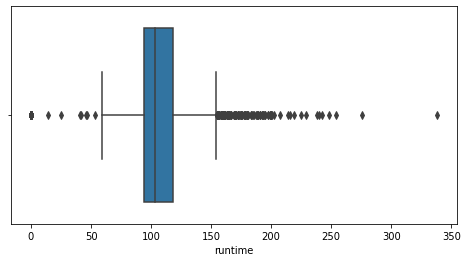

In [75]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['runtime']);

In [31]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')